### Unsupervised Machine learning
#### Practicaly implimentation of K-Means algorithm

#### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans

In [2]:
data=pd.read_csv('Mall_Customers.csv')
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
data.size

1000

In [4]:
data.shape

(200, 5)

#### Information

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


##### The dataset consists of following five features of 200 customers:

###### CustomerID: Unique ID assigned to the customer
###### Gender: Gender of the customer
###### Age: Age of the customer
###### Annual Income (k$): Annual Income of the customer
###### Spending Score (1-100): Score assigned by the mall based on customer behavior and spending nature.

In [6]:
data.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


<AxesSubplot:>

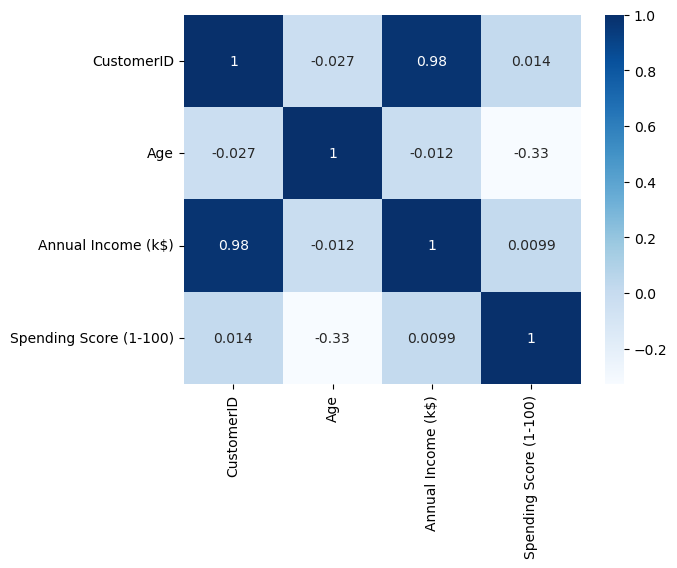

In [7]:
sns.heatmap(data.corr(),annot =True,cmap='Blues')

**Observation**:We can see that the customer id and annual income are highly correlated to each other by 98%

In [8]:
numerical_col = [fea for fea in data if data[fea].dtype != "O"] 
numerical_col

['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

#### Check distribution

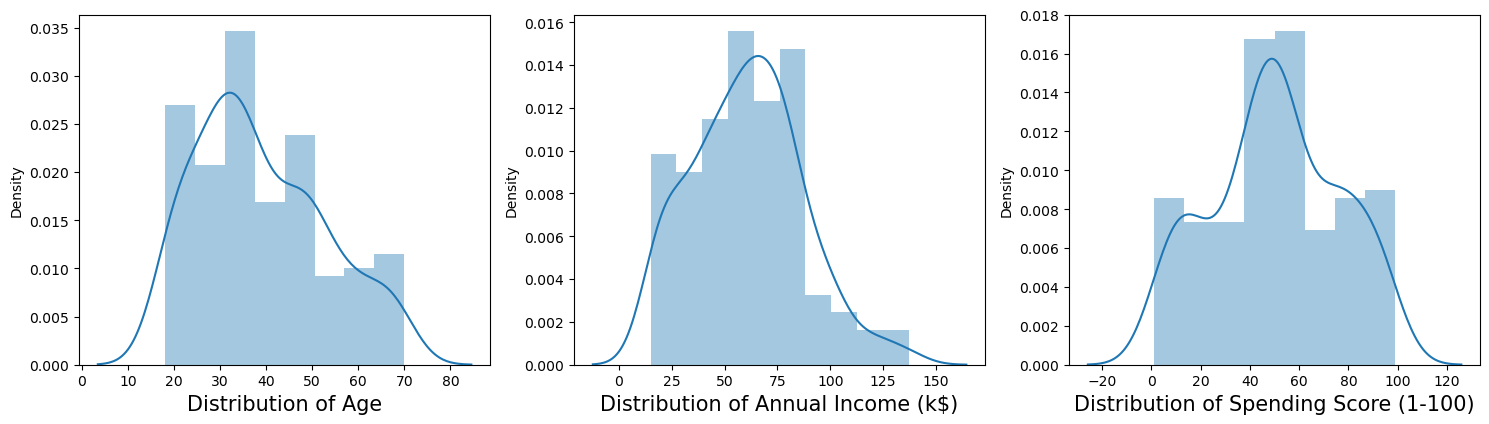

In [9]:
feature_include = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
plt.figure(figsize=(15,8), facecolor='white')
# plt.suptitle('Distribution of Numerical Features',fontweight = "bold",fontsize=15,y = 1)
for i in range(0, len(feature_include)):
    plt.subplot(2, 3, i+1)
    sns.distplot(x=data[feature_include[i]],kde=True) 
    plt.xlabel("Distribution of {}".format(feature_include[i]),fontsize = 15)
    plt.tight_layout()

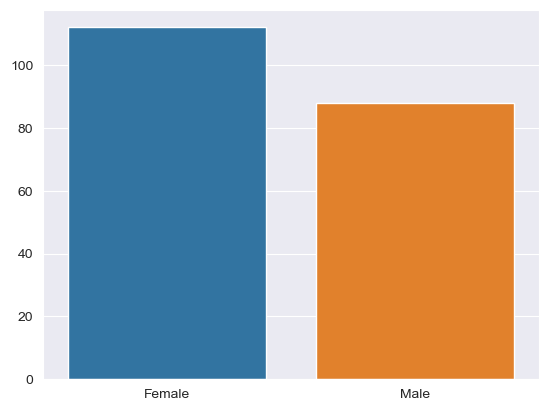

In [10]:
gen = data['Gender'].value_counts()
sns.set_style("darkgrid")
sns.barplot(x = gen.index,y = gen.values)
plt.show()

#### Check null values

In [11]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### check outliers

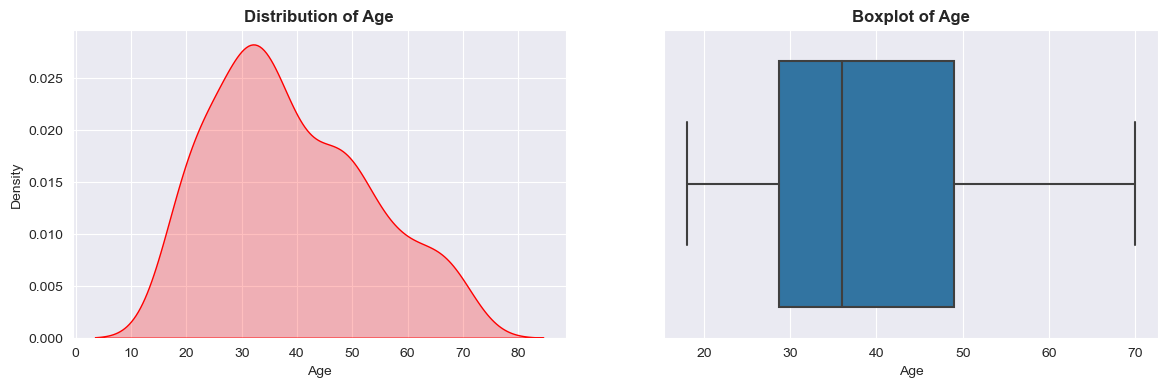

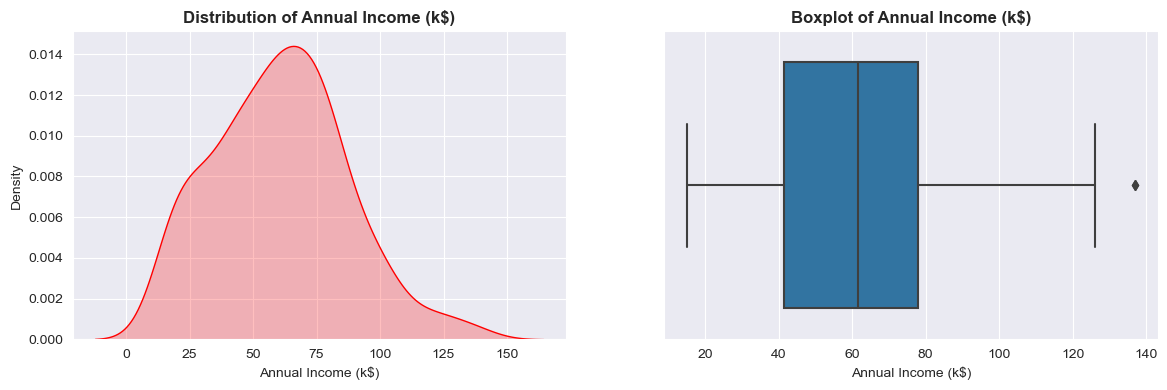

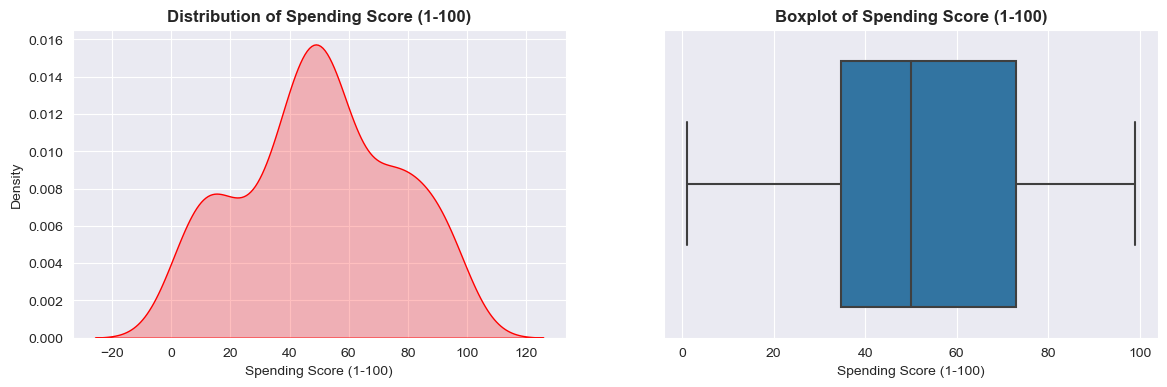

In [12]:
for fea in feature_include:
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    sns.kdeplot(x=data[fea],shade = True, color='r',data=data) 
    plt.title("Distribution of {}".format(fea),fontweight = 'bold' )
    
    plt.subplot(122)
    sns.boxplot(x= fea,data = data[feature_include]) 
    plt.title("Boxplot of {}".format(fea),fontweight = 'bold' )
    plt.show()
    

**Observation**:As we can see there are no outliers in the data ,so we can now build the model 

In [13]:
df = data.copy()

In [14]:
X = df.iloc[:,3:]

In [15]:
#As we want to make clusters we do not require dependent variable
#We use 2 dimentional array

In [16]:
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


#### Scatterplot of input data

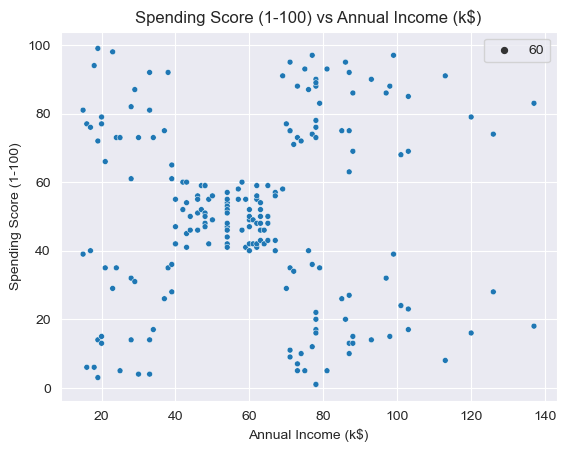

In [17]:
sns.scatterplot(data = X,x = 'Annual Income (k$)', y = 'Spending Score (1-100)',size=60)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.title('Spending Score (1-100) vs Annual Income (k$)')
plt.show()

In [18]:
from sklearn.cluster import KMeans

##### WCSS: Within Cluster sum of squares

In [19]:
# calculate withing cluster sum of sqaure for different values of k
wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(X)
    wcss.append(km.inertia_)

In [20]:
wcss

[269981.28,
 181363.59595959596,
 106348.37306211119,
 73679.78903948834,
 44448.45544793371,
 37442.24745037571,
 30273.394312070042,
 25036.417604033984,
 21826.936303231654,
 19664.685196005543]

#### Plot the elbow curve

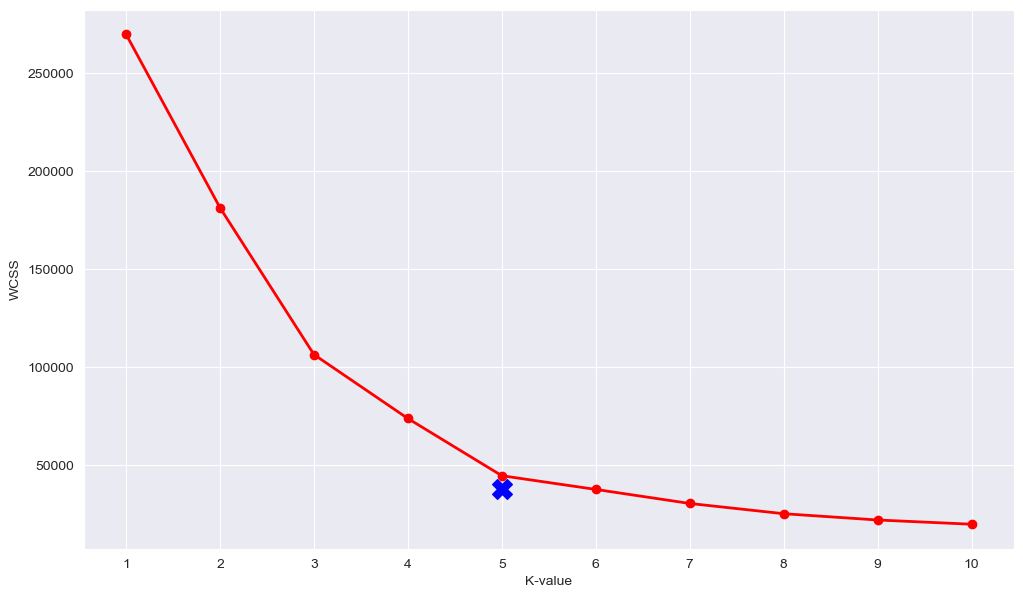

In [21]:
plt.figure(figsize=(12,7))
plt.plot(range(1,11),wcss,linewidth=2,color= 'red',marker = "o")
plt.scatter(5, wcss[5], marker="X", s=200, c="blue")
plt.xlabel("K-value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

**Observation**: We can see that after 5 the line is smooth so that means k = 5 will be fine

In [22]:
# Taking 5 clusters
km1= KMeans(n_clusters=5)
# Fitting the input data
km1.fit(X)
# Predicting the labels of the input data
y_pred = km1.predict(X)

In [23]:
# These are our 5 clusters
y_pred

array([1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 3,
       1, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 0, 2, 3, 2, 0, 2, 0, 2,
       3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [24]:
# Add the cluster column to our main data
df['clusters'] = y_pred
# the new dataframe with the clustering is done
df


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,1
1,2,Male,21,15,81,4
2,3,Female,20,16,6,1
3,4,Female,23,16,77,4
4,5,Female,31,17,40,1
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,0
197,198,Male,32,126,74,2
198,199,Male,32,137,18,0


#### ScatterPlot the new datafreame to see the clusters

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

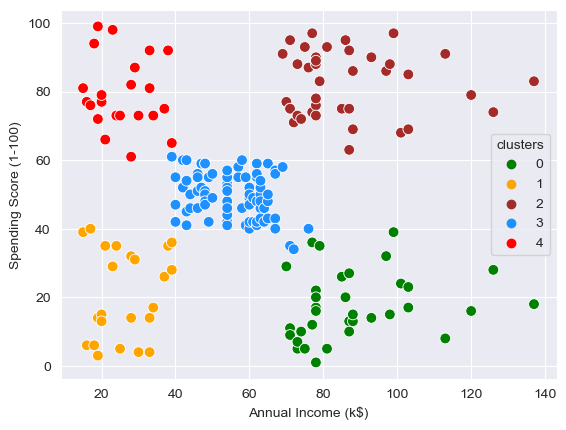

In [25]:

sns.scatterplot(x= 'Annual Income (k$)',y = 'Spending Score (1-100)',data = df,hue = 'clusters',
                palette=['green','orange','brown','dodgerblue','red'], legend='full',s = 60)

**Observation**: This clusering in done by K-means clustering algoritm using 2D array (2 columns)

#### Do clustering using 3 Dimenstions (3 columns)

[308812.78, 212840.1698209719, 143342.751571706, 104366.15145556198, 75378.76464074483, 58300.44332159069, 51153.28301583999, 44344.28038043038, 40936.763713763714, 37389.105565009704, 34140.10819592923, 32384.33049629221, 29409.184139009136, 28434.33794871795]


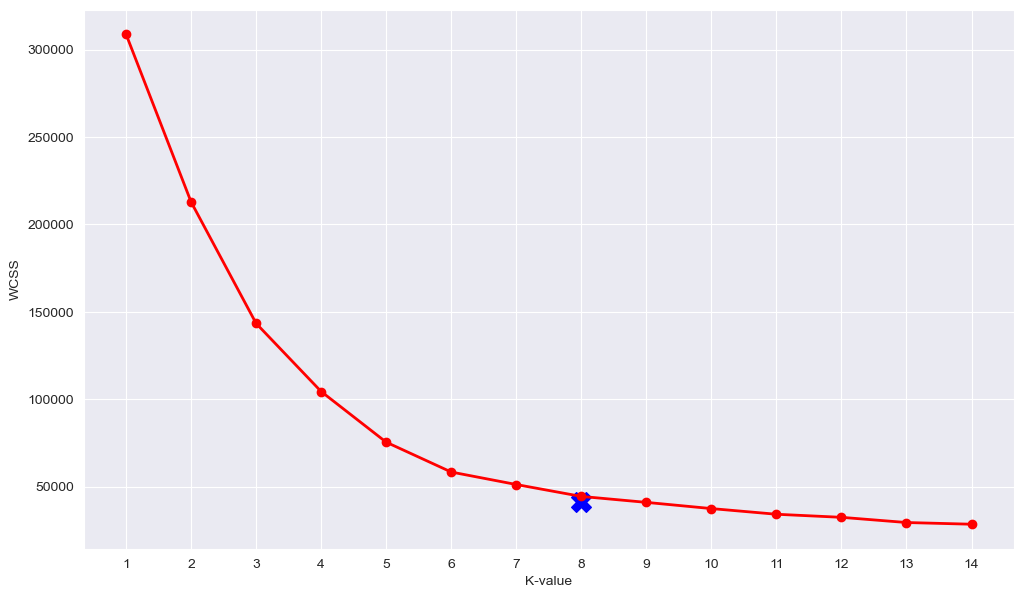

In [32]:
#Taking the features
X2=df[["Age","Annual Income (k$)","Spending Score (1-100)"]]
# calculate withing cluster sum of sqaure for different values of k
wcss2 = []
for k in range(1,15):
    kmeans2 = KMeans(n_clusters=k,init="k-means++")
    kmeans2.fit(X2)
    wcss2.append(kmeans2.inertia_)
print(wcss2)

# plot the elbow curve
plt.figure(figsize=(12,7))
plt.plot(range(1,15),wcss2,linewidth=2,color= 'red',marker = "o")
plt.scatter(8, wcss2[8], marker="X", s=200, c="blue")
plt.xlabel("K-value")
plt.xticks(np.arange(1,15,1))
plt.ylabel("WCSS")
plt.show()

**Observation**: Here we take the value of k = 8,
Because after 8 wcss starts to diminish


In [27]:
km2 = KMeans(n_clusters=8, init="k-means++")
y2 = km2.fit_predict(X2)
y2

array([6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3,
       6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 1, 3, 1, 4,
       6, 3, 1, 4, 4, 4, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 1, 4, 1, 1, 1, 4,
       1, 1, 4, 4, 1, 1, 1, 1, 1, 4, 1, 4, 4, 1, 1, 4, 1, 1, 4, 1, 1, 4,
       4, 1, 1, 4, 1, 4, 4, 4, 1, 4, 1, 4, 4, 1, 1, 4, 1, 4, 1, 1, 1, 1,
       1, 4, 4, 4, 4, 4, 1, 1, 1, 1, 4, 4, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 4, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 2, 7, 5, 7, 5, 7, 5,
       7, 5])

**Observation**: From 0 to 7 these are our 8 clusters

In [28]:
# Add these custers to our dataset
# remove old custers
df.drop('clusters',axis = 1,inplace=True)
# add new custers
df['clusters'] = y2
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,6
1,2,Male,21,15,81,3
2,3,Female,20,16,6,6
3,4,Female,23,16,77,3
4,5,Female,31,17,40,6
...,...,...,...,...,...,...
195,196,Female,35,120,79,5
196,197,Female,45,126,28,7
197,198,Male,32,126,74,5
198,199,Male,32,137,18,7


In [29]:
df['clusters'].unique()

array([6, 3, 1, 4, 2, 0, 7, 5])

#### 3D Plot the clustering


##### As we have input 3 Dimentional array (3 columns) now we have to 3D plot to see our clusters

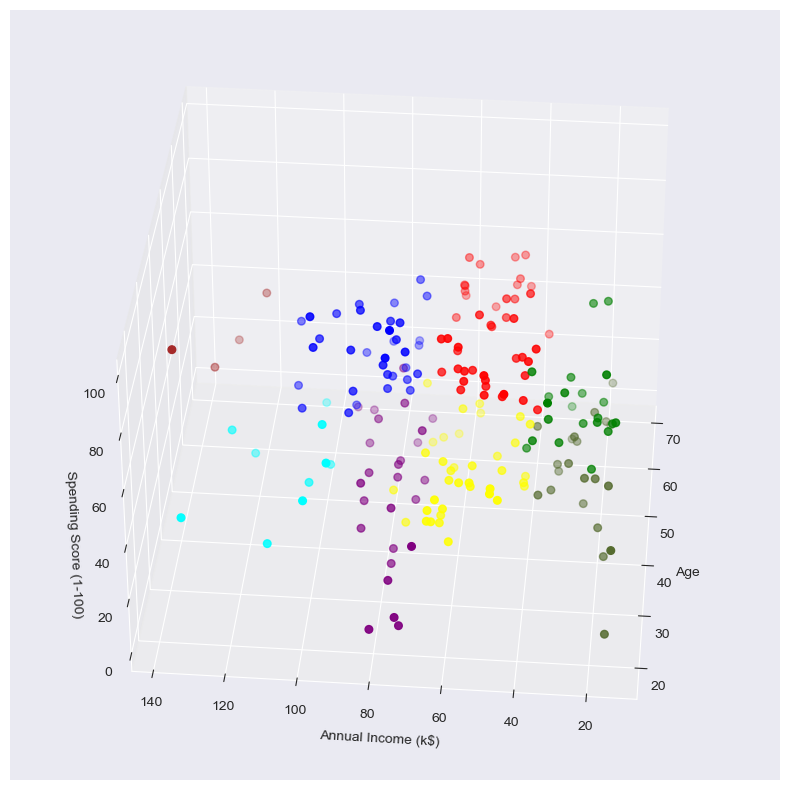

In [30]:
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111,projection = '3d')

ax.scatter(df.Age[df.clusters == 0],df['Annual Income (k$)'][df['clusters'] == 0],df['Spending Score (1-100)'][df.clusters == 0], c ='purple',s=30)
ax.scatter(df.Age[df.clusters == 1],df['Annual Income (k$)'][df['clusters'] == 1],df['Spending Score (1-100)'][df.clusters == 1], c ='red',s=30)
ax.scatter(df.Age[df.clusters == 2],df['Annual Income (k$)'][df['clusters'] == 2],df['Spending Score (1-100)'][df.clusters == 2], c ='blue',s=30)
ax.scatter(df.Age[df.clusters == 3],df['Annual Income (k$)'][df['clusters'] == 3],df['Spending Score (1-100)'][df.clusters == 3], c ='green',s=30)
ax.scatter(df.Age[df.clusters == 4],df['Annual Income (k$)'][df['clusters'] == 4],df['Spending Score (1-100)'][df.clusters == 4], c ='yellow',s=30)
ax.scatter(df.Age[df.clusters == 5],df['Annual Income (k$)'][df['clusters'] == 5],df['Spending Score (1-100)'][df.clusters == 5], c ='brown',s=30)
ax.scatter(df.Age[df.clusters == 6],df['Annual Income (k$)'][df['clusters'] == 6],df['Spending Score (1-100)'][df.clusters == 6], c ='darkolivegreen',s=30)
ax.scatter(df.Age[df.clusters == 7],df['Annual Income (k$)'][df['clusters'] == 7],df['Spending Score (1-100)'][df.clusters == 7], c ='cyan',s=30)
ax.view_init(35,185)
plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

In [31]:
for i in range(0,len(df['clusters'].unique())):
    cust = df[df['clusters'] == i]
    print(f"Number of customer in group {i} = {len(cust)}") 
    print(f"They are - {cust['CustomerID'].values}")
    print("-"*100)

Number of customer in group 0 = 26
They are - [125 127 129 131 135 137 139 141 145 147 149 151 153 155 157 159 161 163
 165 167 169 171 173 175 177 179]
----------------------------------------------------------------------------------------------------
Number of customer in group 1 = 45
They are - [ 41  43  47  51  54  55  56  57  58  60  61  63  64  65  67  68  71  72
  73  74  75  77  80  81  83  84  86  87  90  91  93  97  99 102 103 105
 107 108 109 110 111 117 118 119 120]
----------------------------------------------------------------------------------------------------
Number of customer in group 2 = 35
They are - [124 126 128 130 132 134 136 138 140 142 144 146 148 150 152 154 156 158
 160 162 164 166 168 170 172 174 176 178 180 182 184 186 188 190 192]
----------------------------------------------------------------------------------------------------
Number of customer in group 3 = 22
They are - [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 46]
-----------